In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
96
0.64
    Sepal.Length Sepal.Width Petal.Length Petal.Width     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3            6         2.5   virginica
2            6.2          NA          5.4         2.3   virginica
3              5         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5           1  versicolor
..           ...         ...          ...         ...         ...
145          6.7         3.1          5.6         2.4   virginica
146          5.6           3          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa
148          6.4         3.1           NA         1.8   virginica
149          5.8         2.6            4          NA  versicolor

[150 rows x 5 columns]
No Violation
Violation : Non-positive values present
3 violations
Violation : Petal Length is less than twice of Petal Width in some place

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: FutureWarning: DataFrame.ftypes is deprecated and will be removed in a future version. Use DataFrame.dtypes instead.


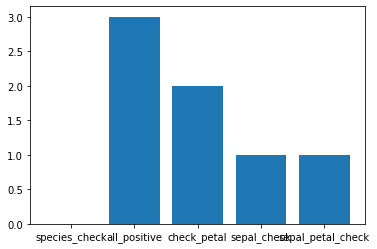

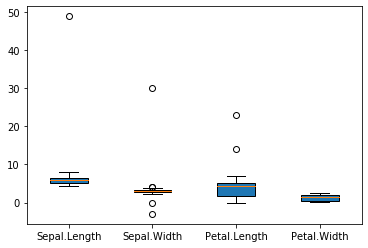

In [16]:
f = pd.read_csv("dirty_iris.txt")
print(f.head())
f.head()    
f.isnull()   
f.dropna()
number_complete = len(f.dropna())
print(number_complete)
complete_percent = len(f.dropna())/len(f)
print(complete_percent)
f.fillna(value="NA",inplace=True)
print(f)
def species_check(f) :
    species = set(["setosa","versicolor","virginica"])
    func = lambda r : r in species
    x = np.array([func(xi) for xi in f["Species"]])
    if (False in x) :
        print("Violation : Invalid species name")
        print(str(len(x) - np.sum(x)) + " violations")
    else :
        print("No Violation")
    return (len(x) - np.sum(x))  
species_check(f)
f.ftypes
temp = pd.read_csv("dirty_iris.txt")
temp.dropna(inplace = True)
temp
def all_positive(f) :
    func = lambda r : r>0
    a = np.array([func(f[xi]) for xi in f.columns[:-1]])
    a = a.reshape(a.shape[0]*a.shape[1])
    if (False in a) :
        print("Violation : Non-positive values present")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
all_positive(temp)
temp["Petal.Length"]>(2*temp["Petal.Width"])
def check_petal(f) :
    a = np.array(f["Petal.Length"]>(2*f["Petal.Width"]))
    if (False in a) :
        print("Violation : Petal Length is less than twice of Petal Width in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
check_petal(temp)
def sepal_check(f) :
    a = np.array(f["Sepal.Length"]<=30)
    if (False in a) :
        print("Violation : Sepal Length is greater than 30 cm in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
sepal_check(temp)
def sepal_petal_check(f) :
    a = np.array(f["Sepal.Length"]>f["Petal.Length"])
    if (False in a) :
        print("Violation : Sepal length is greater than petal length in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
sepal_petal_check(temp)
rules = {"species_check" : species_check, "all_positive" : all_positive, "check_petal" : check_petal, "sepal_check" : sepal_check, "sepal_petal_check" : sepal_petal_check}
x = []
for i in rules.keys() :
    x.append(rules[i](temp))
f.loc[0,:]
plt.bar(rules.keys(),x)
plt.show()
f.describe()
temp.describe()
z = []
for i in range(len(temp.columns)-1) :
    z.append(temp[temp.columns[i]])
plt.boxplot(z,labels=temp.columns[:-1],patch_artist=True)
plt.show()